# Hashtings Direct Task

#### Background:
Insurance companies make pricing decisions based on historical claims experience. The more recent the claims experience, the more predictive it may be of future losses. In the case of many large claims however, the exact cost is not known at the time of the accident. In fact, some cases take years to develop and settle. Companies sometimes learn that a claim is large several years after the accident took place.

Your Underwriting Director believes it is possible to predict the ultimate value of individual claims well in advance by using FNOL (First Notification Of Loss) characteristics. This is the information recorded when the claim is first notified. If so, it would allow the company to know about future costs earlier and this information could be used to make better pricing decisions.

You are given a historical dataset of a particular type of claim - head-on collisions - and are also told their individual current estimated values (labelled Incurred). (Given these claims are now a few years old, you can assume the incurred values are equal to the cost at which the claims will finally settle).

#### Task breakdown:
1) In tables or charts, describe the data set you have been given.  For example, you might want to consider:
- How many claims are there in total?
- What is the average value of the claims?
- Are there any trends from year to year and can you explain these trends? 
- What does the capped incurred column signify and why might this be used?
- Anything else that you find interesting.

2) Using your analysis skills and judgement, look at average claim size by a variety of factors to assess which are the most important predictors of individual claim size. Please illustrate your findings. Can you explain why these factors are important? 

3) Are any other factors you think may be available at FNOL that would help you to predict individual claim sizes better? What are they and why do you think they will be predictive? 

4) Some of the information in the data set is clearly missing. Why might we be missing this data and how does this impact any predictions you might make?

5) Discuss how you would use this information to build a model for predicting ultimate individual claims amounts. 

6) Prepare a 30 minute presentation outlining your findings in 1-5.

Note: columns beginning with TP_* show the number of third parties involved in an accident (under a given category)

#### Assumptions
1) date of loss - the day when the claim was paid / or the day when the accident happend

2) notification period - how many days passed since HD was notified of an accident (could be greater than 365)

3) inception to loss - how many days, since the insurance became active, the claim was made

In [316]:
# initialisation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# to display all of the columns and rows and max width
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%config InlineBackend.figure_format = 'svg'  # improves the quality of graphs
%matplotlib inline
sns.set()

In [37]:
# column names
columns = ['claim_number', 'date_of_loss', 'notifier', 'loss_code', 'loss_description', 'notification_period',
           'inception_to_loss', 'location_of_incident', 'weather_conditions', 'vehicle_mobile', 'time_hour',
           'main_driver', 'PH_considered_TP_at_fault', 'vechile_registration_present', 'incident_details_present',
           'injury_details_present', 'TP_type_insd_pass_back', 'TP_type_insd_pass_front', 'TP_type_driver',
           'TP_type_pass_back', 'TP_type_pass_front', 'TP_type_bike', 'TP_type_cyclist', 'TP_type_pass_multi',
           'TP_type_pedestrian', 'TP_type_other', 'TP_type_nk', 'TP_injury_whiplash', 'TP_injury_traumatic',
           'TP_injury_fatality', 'TP_injury_unclear', 'TP_injury_nk', 'TP_region_eastang', 'TP_region_eastmid',
           'TP_region_london', 'TP_region_north', 'TP_region_northw', 'TP_region_outerldn', 'TP_region_scotland',
           'TP_region_southe', 'TP_region_southw', 'TP_region_wales', 'TP_region_westmid', 'TP_region_yorkshire',
           'incurred', 'capped_incurred']

# read the xls file
data = pd.read_excel(io='Application_test_WA_2019-01.xls', sheet_name='Data', names=columns,
                     index_col=0, parse_dates=['date_of_loss'])

In [38]:
data.head()

,date_of_loss,notifier,loss_code,loss_description,notification_period,inception_to_loss,location_of_incident,weather_conditions,vehicle_mobile,time_hour,...,TP_region_northw,TP_region_outerldn,TP_region_scotland,TP_region_southe,TP_region_southw,TP_region_wales,TP_region_westmid,TP_region_yorkshire,incurred,capped_incurred
claim_number,,,,,,,,,,,,,,,,,,,,,
1,2003-04-15,PH,LD003,Head on collision,22,13,Main Road,NORMAL,Y,10,...,1,0,0,0,0,0,0,0,0.00,0.00
2,2003-04-20,CNF,LD003,Head on collision,1,9,Main Road,WET,Y,18,...,0,0,0,1,0,0,0,0,1925.88,1925.88
3,2003-04-24,CNF,LD003,Head on collision,5,17,Main Road,WET,Y,16,...,1,0,0,0,0,0,0,0,839.34,839.34
4,2003-05-13,CNF,LD003,Head on collision,1,23,Main Road,N/K,Y,14,...,0,0,0,0,0,0,1,0,2426.76,2426.76
5,2003-06-11,CNF,LD003,Head on collision,1,48,Other,N/K,N,9,...,0,0,0,0,0,0,0,0,2169.72,2169.72


In [39]:
data.tail()

,date_of_loss,notifier,loss_code,loss_description,notification_period,inception_to_loss,location_of_incident,weather_conditions,vehicle_mobile,time_hour,...,TP_region_northw,TP_region_outerldn,TP_region_scotland,TP_region_southe,TP_region_southw,TP_region_wales,TP_region_westmid,TP_region_yorkshire,incurred,capped_incurred
claim_number,,,,,,,,,,,,,,,,,,,,,
7687,2015-06-30,Other,LD003,Head on collision,1,83,Main Road,NORMAL,N,16,...,1,0,0,0,0,0,0,0,483.18,483.18
7688,2015-06-30,Other,LD003,Head on collision,0,25,Minor Road,NaN,Y,14,...,0,0,0,0,0,0,0,2,29548.88,29548.88
7689,2015-06-30,Other,LD003,Head on collision,0,60,Minor Road,NORMAL,Y,9,...,0,0,0,1,0,0,0,0,3557.64,3557.64
7690,2015-06-30,Other,LD003,Head on collision,1,253,Minor Road,NORMAL,N,19,...,0,0,0,0,0,0,0,0,20674.58,20674.58
7691,2015-06-30,Other,LD003,Head on collision,0,266,Minor Road,NORMAL,Y,14,...,0,0,0,0,0,0,0,1,1323.68,1323.68


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7691 entries, 1 to 7691
Data columns (total 45 columns):
date_of_loss                    7691 non-null datetime64[ns]
notifier                        7691 non-null object
loss_code                       7691 non-null object
loss_description                7691 non-null object
notification_period             7691 non-null int64
inception_to_loss               7691 non-null int64
location_of_incident            7691 non-null object
weather_conditions              7346 non-null object
vehicle_mobile                  7691 non-null object
time_hour                       7691 non-null int64
main_driver                     7691 non-null object
PH_considered_TP_at_fault       7691 non-null object
vechile_registration_present    7691 non-null int64
incident_details_present        7691 non-null int64
injury_details_present          7691 non-null int64
TP_type_insd_pass_back          7691 non-null int64
TP_type_insd_pass_front         7691 non-nul

In [311]:
# summary statistics for continuous variables
data.describe()[['notification_period', 'inception_to_loss', 'incurred', 'capped_incurred']].round(2)

,notification_period,inception_to_loss,incurred,capped_incurred
count,7691.00,7691.00,7691.00,7691.00
mean,7.16,166.85,6478.43,4496.94
std,39.14,104.45,34273.24,8943.11
min,-18.00,0.00,-7245.58,-7245.58
25%,0.00,75.00,17.12,17.12
50%,1.00,161.00,850.92,850.92
75%,2.00,253.00,4302.61,4302.61
max,1042.00,365.00,1341913.95,50000.00


Summary statistics show us general information about the relevant columns in the dataset. For example, we can see:

1) How many claims the dataset contains;

2) What is the average value of the claim incurred and capped incurred;

3) Average notification period, which presumably shows how quickly people notify about the incident. The value is rather low at 7 days, while most of the data is within 0 and 2 range. Max and min show significant outliers;

4) Claims could be negative;

5) Capped incurred column is kept at £50,000 max;

6) Most of the claims are below £4302.61 in size. 

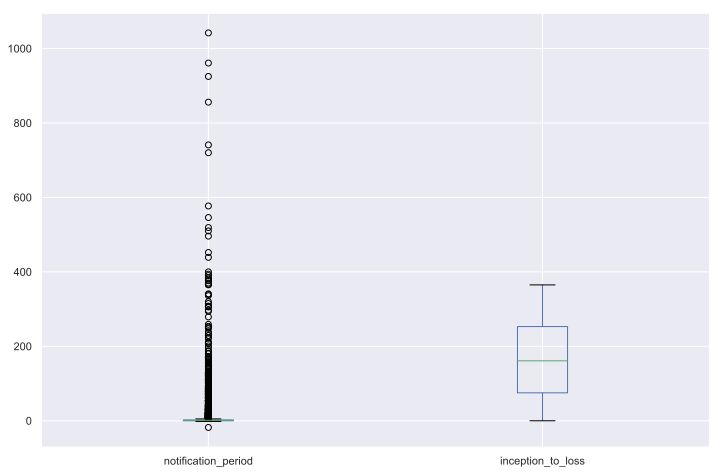

In [320]:
data[['notification_period', 'inception_to_loss']].boxplot(figsize=(12,8), )

We can see that Notification Period column has a lot of outliers while inception to loss column looks normal.
Below we see the number of values in the notification period column that are positioned further from the majority of our data and so it is safe to consider them outliers for this case. Approximately 17% of data.

In [336]:
print('Number of outliers in the notification period column:')
print(str(len(data[data['notification_period'] > 5])) )
print(str(len(data[data['notification_period'] > 40])) )
print(str(len(data[data['notification_period'] > 120])) )

Number of outliers in the notification period column:
988
264
98


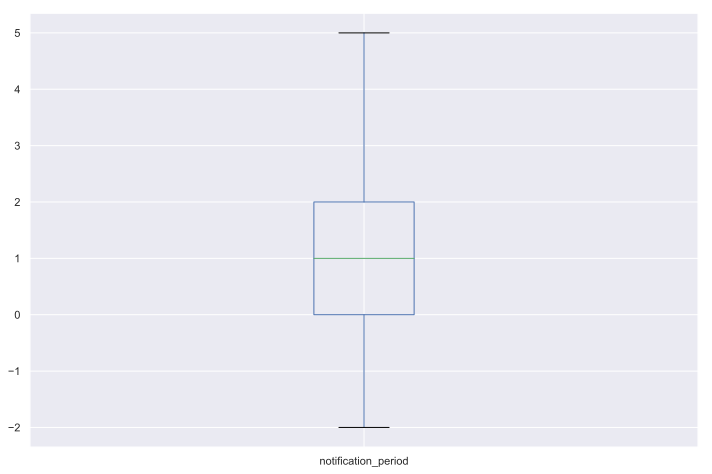

In [338]:
# remove the outliers from the notification period attribute and see where 80% of our data is
data[['notification_period']].boxplot(figsize=(12,8), showfliers=False)

Notification period could be negative. Although, looking at the number of occurances, it could just be a mistake.

In [317]:
data[data.notification_period < 0]  # mistake?

,date_of_loss,notifier,loss_code,loss_description,notification_period,inception_to_loss,location_of_incident,weather_conditions,vehicle_mobile,time_hour,main_driver,PH_considered_TP_at_fault,vechile_registration_present,incident_details_present,injury_details_present,TP_type_insd_pass_back,TP_type_insd_pass_front,TP_type_driver,TP_type_pass_back,TP_type_pass_front,TP_type_bike,TP_type_cyclist,TP_type_pass_multi,TP_type_pedestrian,TP_type_other,TP_type_nk,TP_injury_whiplash,TP_injury_traumatic,TP_injury_fatality,TP_injury_unclear,TP_injury_nk,TP_region_eastang,TP_region_eastmid,TP_region_london,TP_region_north,TP_region_northw,TP_region_outerldn,TP_region_scotland,TP_region_southe,TP_region_southw,TP_region_wales,TP_region_westmid,TP_region_yorkshire,incurred,capped_incurred
claim_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6124,2014-08-08,Other,LD003,Head on collision,-1,312,Minor Road,NORMAL,Y,13,Y,N,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,504.03,504.03
6371,2014-10-06,Other,LD003,Head on collision,-18,95,Not Applicable,N/K,N,0,Y,N,1,1,0,0,0,1,0,1,0,0,0,0,1,0,2,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,6543.54,6543.54
6813,2014-12-26,Other,LD003,Head on collision,-2,117,Minor Road,"SNOW,ICE,FOG",Y,19,Y,N,1,0,0,0,0,1,1,0,0,0,0,0,1,0,2,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,6256.12,6256.12


These claims look normal. Potentially, they mean that original claim had a mistake in calculations and these claims are refunds paid back.

In [315]:
data[data.incurred < 0]  # all of the negative claims (48 in total)

,date_of_loss,notifier,loss_code,loss_description,notification_period,inception_to_loss,location_of_incident,weather_conditions,vehicle_mobile,time_hour,...,TP_region_northw,TP_region_outerldn,TP_region_scotland,TP_region_southe,TP_region_southw,TP_region_wales,TP_region_westmid,TP_region_yorkshire,incurred,capped_incurred
claim_number,,,,,,,,,,,,,,,,,,,,,
237,2004-06-26,Other,LD003,Head on collision,0,108,Main Road,WET,N,8,...,0,0,0,0,0,0,0,0,-56.93,-56.93
897,2006-10-16,CNF,LD003,Head on collision,0,97,Main Road,NORMAL,N,7,...,1,0,0,0,0,0,0,0,-0.01,-0.01
1014,2007-01-12,PH,LD003,Head on collision,0,95,Main Road,NORMAL,N,6,...,0,1,0,0,0,0,1,0,-180.88,-180.88
1099,2007-03-15,Other,LD003,Head on collision,0,119,Minor Road,NORMAL,N,12,...,0,0,0,0,0,0,1,0,-12.66,-12.66
1161,2007-04-30,Other,LD003,Head on collision,0,175,Main Road,NORMAL,N,15,...,0,0,0,0,0,0,0,0,-90.88,-90.88
1282,2007-07-14,Other,LD003,Head on collision,2,178,Main Road,NORMAL,N,17,...,0,0,0,0,0,0,0,1,-122.39,-122.39
1284,2007-07-16,CNF,LD003,Head on collision,1,85,Minor Road,NORMAL,N,20,...,0,0,0,0,1,0,0,0,-310.42,-310.42
1360,2007-09-14,CNF,LD003,Head on collision,5,106,Main Road,WET,Y,15,...,0,0,0,0,1,0,0,0,-540.04,-540.04
1417,2007-10-31,PH,LD003,Head on collision,0,322,Minor Road,NORMAL,N,10,...,0,0,0,0,0,0,0,0,-682.34,-682.34


### Task Answers

#### How many claims are there in total?
#### What is the average value of the claims?

In [78]:
total_claims_incurred = data[data.capped_incurred > 0]
total_negative_claims = data[data.capped_incurred < 0]
zero_claims = data[data.capped_incurred == 0]
total_claims = len(data)
avg_claim_inc = data['incurred'].mean()
avg_claim_capped_inc = data['capped_incurred'].mean()

print('There are a total of ' + str(total_claims) + ' claim, of which ' + str(len(total_claims_incurred)) + 
      ' positive claims ' + str(len(total_negative_claims)) + ' negative claims and ' + str(len(zero_claims)) + 
      ' zero claims. The average claim value is ' + str(round(avg_claim_inc, 2)) + 
      ' and the average claim capped incurred is '+
      str(round(avg_claim_capped_inc, 2)))

There are a total of 7691 claims, of which 5889 positive claims 48 negative claims and 1754 zero claims. The average claim value is 6478.43 and the average claim capped incurred is 4496.94


##### There are a total of 7691 claims, of which 5889 positive claims, 48 negative claims and 1754 zero claims. The average claim value is £6478.43 and the average claim capped incurred is £4496.94

In [198]:
# claims per year histogram
annualy_grouped_data = data.groupby(pd.Grouper(key='date_of_loss', freq='A'))
monthly_grouped_data = data.groupby(pd.Grouper(key='date_of_loss', freq='M'))

There is a clear trend showing that number of claims grow with time. Especially, since 2011. It could be explained with raises in consumer confidence after recessions and more car purchases and so more claims from accidents.

In 2015 only 6 months of the data available, hence the drop occurs on the graph


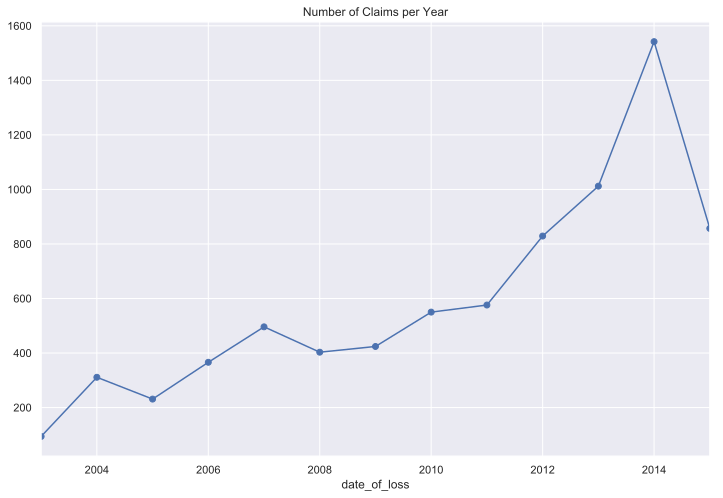

In [300]:
annualy_grouped_data.notifier.count().plot(figsize=(12, 8), title='Number of Claims per Year', marker='o')
print('In 2015 only 6 months of the data available, hence the drop occurs on the graph')

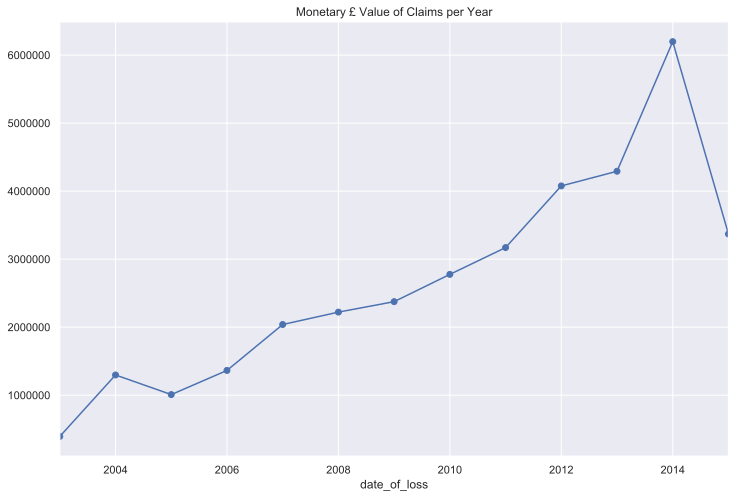

In [339]:
annualy_grouped_data.capped_incurred.sum().plot(figsize=(12, 8), title='Monetary £ Value of Claims per Year',
                                                marker='o')

On the histogram below, we can see the months which resulted in most money spend according to the capped incurred column. Most of the money were spent in December, November and June.

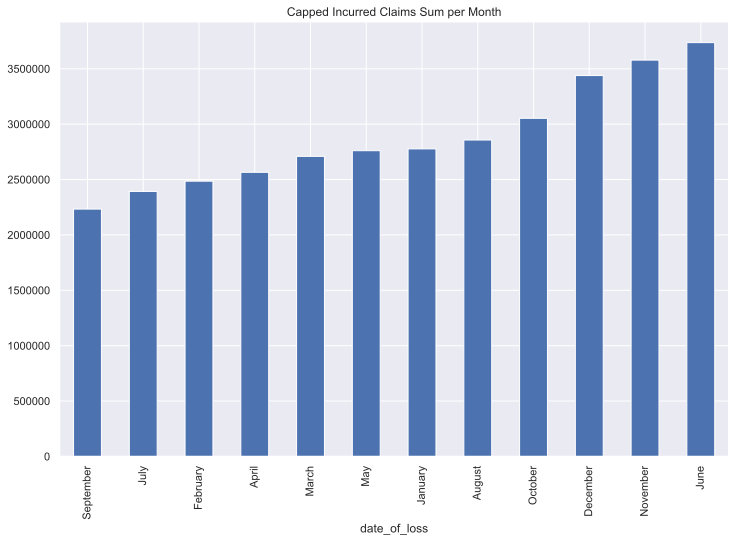

In [302]:
gname='Capped Incurred Claims Sum per Month'
data.groupby(data['date_of_loss'].dt.strftime('%B'))['capped_incurred'].sum().sort_values().plot(kind='bar',
                                                                                                 figsize=(12, 8),
                                                                                                 title=gname)

Looking at the incurred column, we can see a different picture. This is the result of large claims.

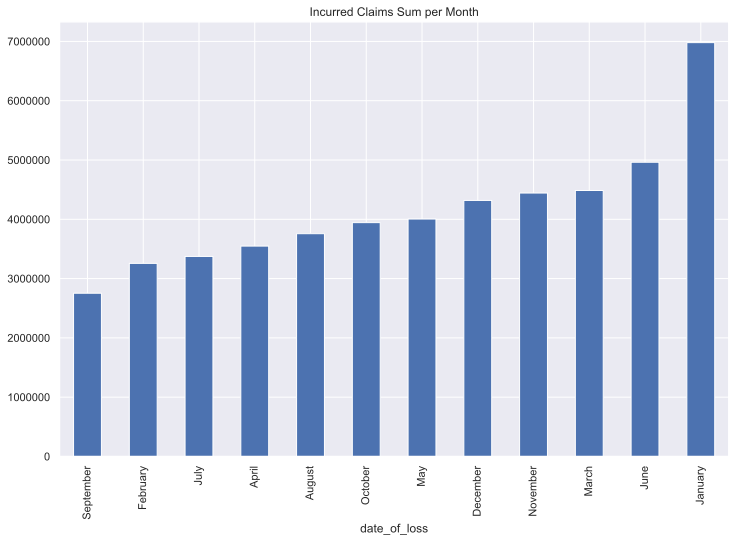

In [303]:
gname='Incurred Claims Sum per Month'
data.groupby(data['date_of_loss'].dt.strftime('%B'))['incurred'].sum().sort_values().plot(kind='bar',
                                                                                          figsize=(12, 8),
                                                                                          title=gname)

November, June and December have the most number of claims. 

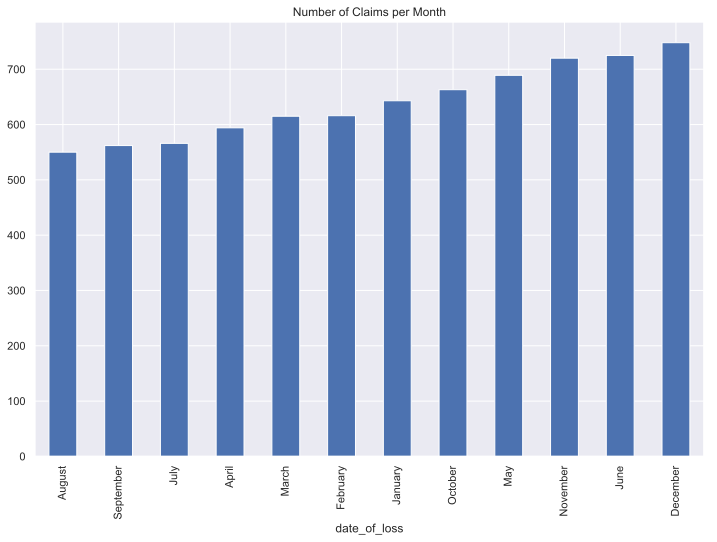

In [304]:
gname='Number of Claims per Month'
data.groupby(data['date_of_loss'].dt.strftime('%B'))['notifier'].count().sort_values().plot(kind='bar',
                                                                                            figsize=(12, 8),
                                                                                            title=gname)

The following graph show in which regions most of the claims were made.

Count of values per region where we have 1 or more. 1 or more is used because sometimes you have up to 9 people in one claim and this could bias results. This shows us how many incidents occured in certain regions. Sorted in ascending order.

TP_region_southe       722
TP_region_southw       600
TP_region_yorkshire    460
TP_region_westmid      429
TP_region_northw       370
TP_region_wales        334
TP_region_eastmid      309
TP_region_eastang      245
TP_region_outerldn     234
TP_region_north        163
TP_region_london       124
TP_region_scotland     118
dtype: int64



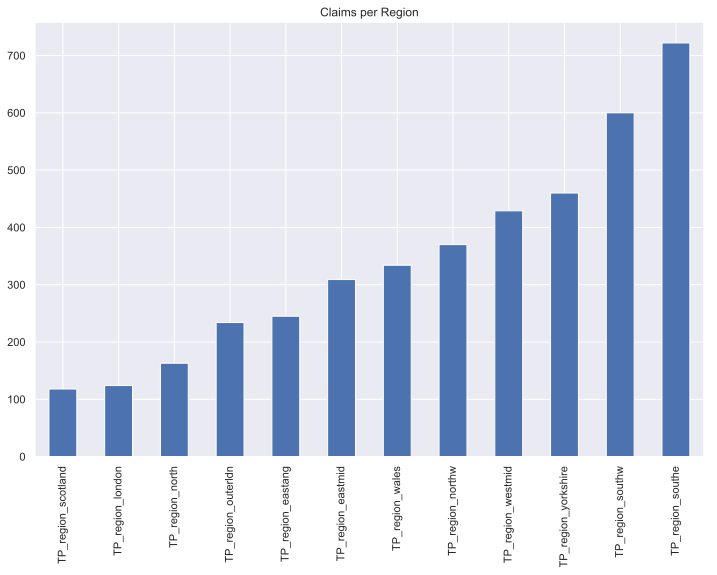

In [314]:
print('Count of values per region where we have 1 or more. 1 or more is used because sometimes',
      'you have up to 9 people in one claim and this could bias results. This shows us how many incidents occured',
      'in certain regions. Sorted in ascending order.')
print()
print((data.loc[:,'TP_region_eastang':'TP_region_yorkshire'] >= 1.0).sum().sort_values(ascending=False))
print()
(data.loc[:,'TP_region_eastang':'TP_region_yorkshire'] >= 1.0).sum().sort_values().plot(kind='bar', figsize=(12, 8),
                                                                                        title='Claims per Region')

The correlation plot show the relationships between the variables. We can see from it that most of the time there is no relationship, apart from "TP type nk" and "TP type driver" columns. Also, between "TP injury whiplash" and both "TP type pass back / front".

Text(0.5, 0.98, 'Correlation Heatmap of Attributes in the Dataset')

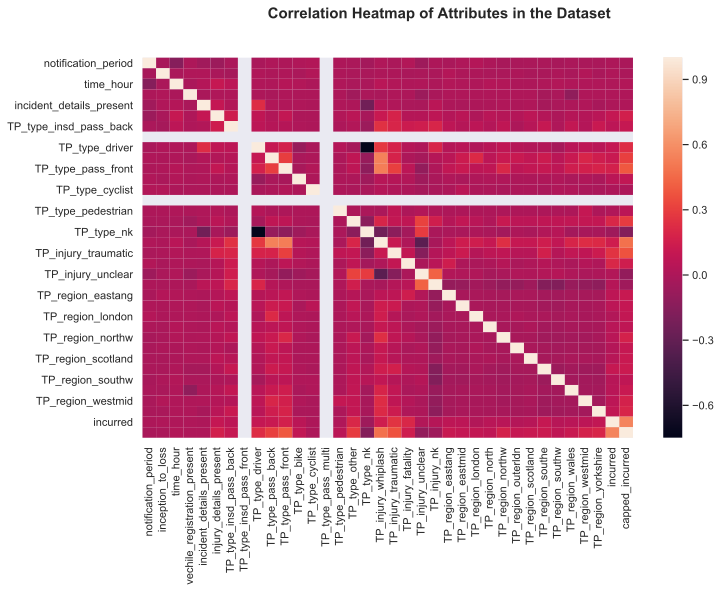

In [310]:
# correlation matrix
corrmat = data.corr()
fig, ax = plt.subplots(figsize=(11, 7))
sns.heatmap(corrmat)
fig.suptitle('Correlation Heatmap of Attributes in the Dataset', 
             fontsize=15, fontweight='bold', ha='center')

The following two tables show the relationship between the target variables "Incurred" and "Capped Incurred". This allows us to see which columns could have the most predictive power for us.

In [276]:
print('NaN at the bottom is because we have only 0 at the column all the time')
print()
print(corrmat["incurred"].sort_values(ascending=False))

NaN at the bottom is because we have only 0 at the column all the time

incurred                        1.000000
capped_incurred                 0.555137
TP_injury_traumatic             0.252033
TP_type_other                   0.198345
TP_injury_fatality              0.194936
TP_type_pass_front              0.164683
TP_injury_whiplash              0.141303
TP_type_pass_back               0.113048
TP_region_southe                0.104943
injury_details_present          0.094364
TP_type_driver                  0.091353
TP_region_yorkshire             0.081511
TP_region_eastang               0.070791
TP_region_westmid               0.063880
TP_type_insd_pass_back          0.063193
TP_region_eastmid               0.060708
TP_type_bike                    0.056199
TP_region_northw                0.045868
TP_region_wales                 0.044515
TP_region_north                 0.044479
TP_region_scotland              0.041719
TP_region_southw                0.036932
TP_injury_nk              

### In case of "Capped Incurred" column, more of the variables have stronger correlations, which means that they potentially could be more useful for predicting target "Capped Incurred" column. 

In [278]:
print('NaN at the bottom is because we have only 0 at the column all the time')
print()
print(corrmat["capped_incurred"].sort_values(ascending=False))

NaN at the bottom is because we have only 0 at the column all the time

capped_incurred                 1.000000
incurred                        0.555137
TP_injury_whiplash              0.478289
TP_type_pass_front              0.388891
TP_injury_traumatic             0.366098
TP_type_pass_back               0.297619
TP_type_other                   0.284439
TP_type_driver                  0.224175
TP_region_yorkshire             0.190198
TP_region_westmid               0.173226
TP_region_northw                0.172374
injury_details_present          0.159324
TP_injury_fatality              0.145110
TP_region_southe                0.124319
TP_region_scotland              0.118557
TP_region_wales                 0.112487
TP_region_eastang               0.106811
TP_region_outerldn              0.104379
TP_type_insd_pass_back          0.103593
TP_region_eastmid               0.092502
TP_region_london                0.087094
TP_type_bike                    0.084069
TP_region_north           

#### 3) Are any other factors you think may be available at FNOL that would help you to predict individual claim sizes better? What are they and why do you think they will be predictive?

1) Information about the client related to the claim (car (model, make, age, driving behaviour, estimated value of car/parts), type of insurance, past claims of that client);

2) Information about the Third Party transportation (car/bike, age, estimated value of car/parts) or about anything that got damaged;

3) Sex of client and TP (potentially, could aid in understanding whose fault it was)

4) Disabilities (potentially, you would need to account for additional treatments/medicine)

5) Hit and run situation (more work needs to be done in that case which costs more)

6) If anyone has admitted their fault

#### 4) Some of the information in the data set is clearly missing. Why might we be missing this data and how does this impact any predictions you might make?

In [287]:
print(data['location_of_incident'].value_counts())
print()
print('For example one party said that it was on the main road and the other said that it was on the minor road'
      'if there are no witnesses or GPS location, then it is difficult to identify exact type location')

Minor Road        4249
Main Road         2702
Car Park           225
n/k                213
Other              117
Home Address       104
Not Applicable      56
Motorway            25
Name: location_of_incident, dtype: int64

For example one party said that it was on the main road and the other said that it was on the minor roadif there are no witnesses or GPS location, then it is difficult to identify exact type location


In [289]:
print(data['weather_conditions'].value_counts())
print()
print("Again, parties may have contradicting statements and can't agree")

NORMAL          4564
WET             1903
N/K              450
SNOW,ICE,FOG     429
Name: weather_conditions, dtype: int64

Again, parties may have contradicting statements and can't agree


In [290]:
print(data['vehicle_mobile'].value_counts())
print()
print("because the person has no mobile phone or has changed it and didn't notify about this")

Y      4046
N      3203
n/k     442
Name: vehicle_mobile, dtype: int64

because the person has no mobile phone or has changed it and didn't notify about this


In [227]:
print(data['PH_considered_TP_at_fault'].value_counts())  # PH = Policy Holder?
print()
print('# is most likely just a typo; n/k could be because of the fatality/injury')

N      4855
n/k    2654
Y       181
#         1
Name: PH_considered_TP_at_fault, dtype: int64

#### 5) Discuss how you would use this information to build a model for predicting ultimate individual claims amounts.

I would try to identify attributes or combination of attributes that would yield in the most accurate predicting results.

Depending on the data and its size, I would try different techniques.

I believe that missing data, such as information about the car and information about the Policy Holder and Third Party, would bring the most necessary information needed to develop accurate model. With this information, I can build a classification model, that would be able to estimate potential claim value. Other factors, would be useful to identify whether the claim will result in monetary losses.

For example, first step will be to classify how likely it is that the claim will go through, and in the second step estimate the potential value if it is likely that the claim will go through.